# Flight Fare Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.pandas.set_option("display.max_columns",None) 
pd.set_option('mode.chained_assignment', None)

In [3]:
dataset=pd.read_excel('Data_Train.xlsx')

In [4]:
dataset.shape

(10683, 11)

## Exploratory data analysis

### Univariate Analysis

In [5]:
data=dataset.copy()

#### Missing value detection

In [6]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
data[data['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [8]:
data[data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [9]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [10]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

#### categorical variables

In [85]:
data['Destination'].value_counts()

COK    4537
BLR    2871
DEL    2197
HYD     697
CCU     381
Name: Destination, dtype: int64

In [11]:
data['Additional_Info']=np.where(data['Additional_Info']=='No Info','No info',data['Additional_Info'])

In [12]:
data['Additional_Info'].value_counts()

No info                         8348
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

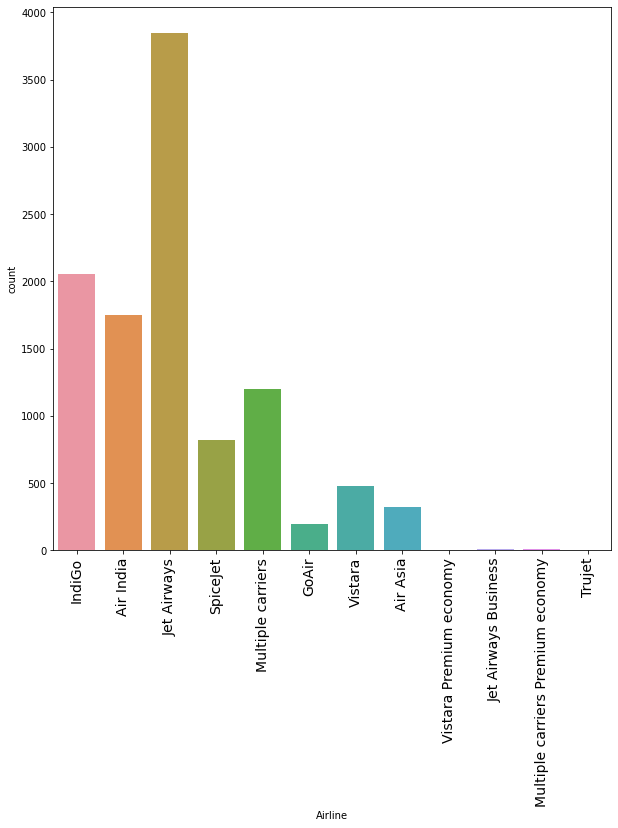

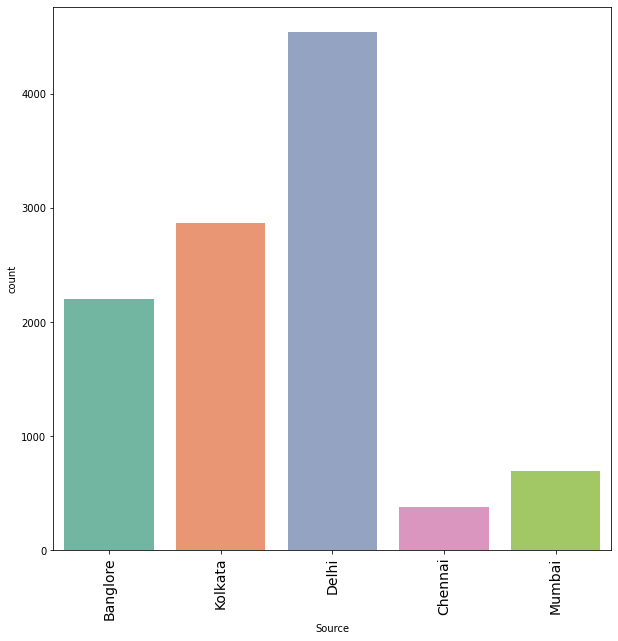

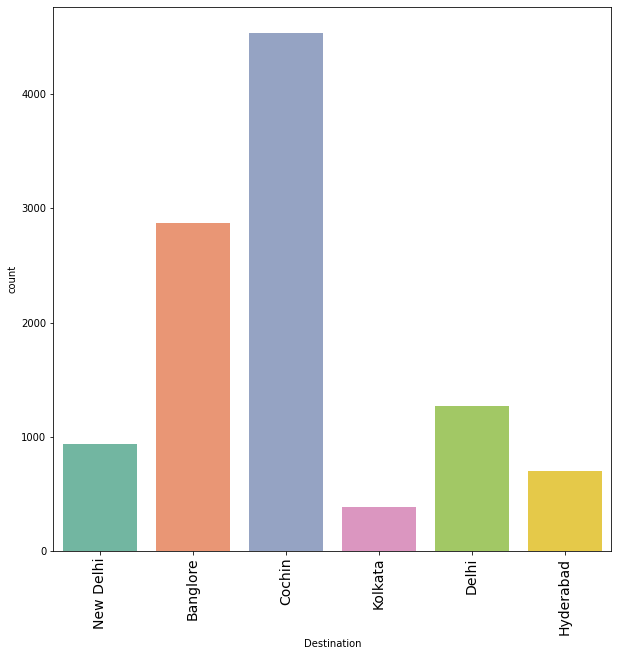

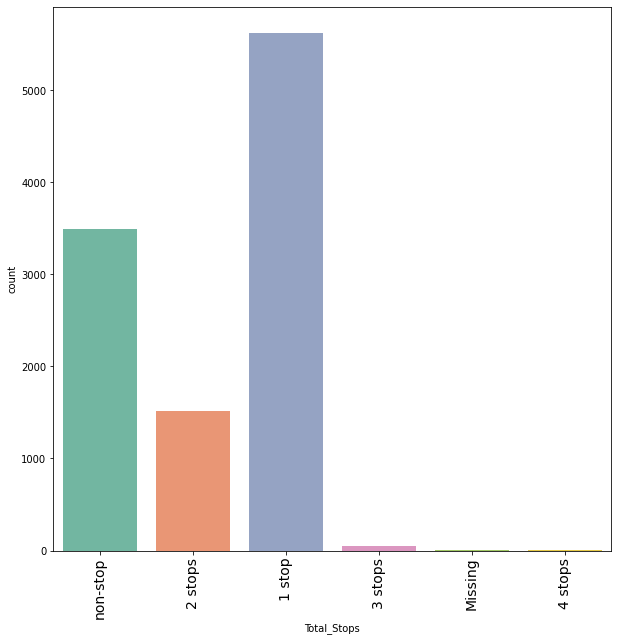

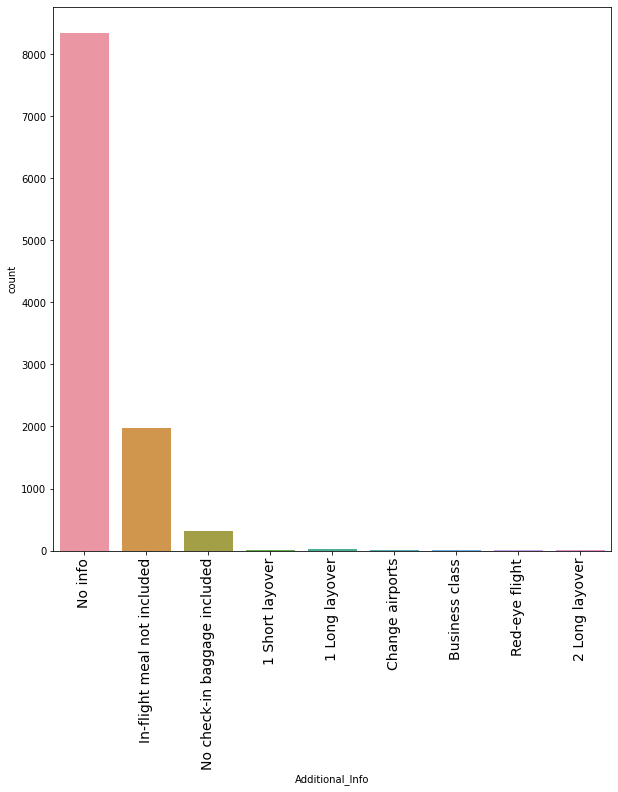

In [13]:
for feature in ['Airline','Source','Destination','Total_Stops','Additional_Info']:
    plt.figure(figsize=(10,10))
    plt.xticks(rotation=90,fontsize=14)
    data[feature]=data[feature].fillna('Missing')
    sns.countplot(x=feature,data=data,palette=sns.set_palette("Set2"))
    plt.show()

#### Date&Time field analysis

In [14]:
datetime_features=['Date_of_Journey','Dep_Time','Arrival_Time', 'Duration']

In [15]:
data[datetime_features]

,Date_of_Journey,Dep_Time,Arrival_Time,Duration
0,24/03/2019,22:20,01:10 22 Mar,2h 50m
1,1/05/2019,05:50,13:15,7h 25m
2,9/06/2019,09:25,04:25 10 Jun,19h
3,12/05/2019,18:05,23:30,5h 25m
4,01/03/2019,16:50,21:35,4h 45m
...,...,...,...,...
10678,9/04/2019,19:55,22:25,2h 30m
10679,27/04/2019,20:45,23:20,2h 35m
10680,27/04/2019,08:20,11:20,3h
10681,01/03/2019,11:30,14:10,2h 40m


In [16]:
data['Date_of_Journey_month']=pd.to_datetime(data['Date_of_Journey'],format='%d/%m/%Y').dt.month
data['Dep_Time_Hour']=pd.to_datetime(data['Dep_Time']).dt.hour
data['Dep_Time_Min']=pd.to_datetime(data['Dep_Time']).dt.minute
data['Arrival_Time_Hour']=pd.to_datetime(data['Arrival_Time']).dt.hour
data['Arrival_Time_Min']=pd.to_datetime(data['Arrival_Time']).dt.minute

In [17]:
duration=pd.to_timedelta(pd.to_datetime(data['Arrival_Time']) -pd.to_datetime(data['Dep_Time']))
data['duration_hours']=duration.dt.components['hours']
data['duration_minutes']=duration.dt.components['minutes']
data['duration_total_minutes']=duration.dt.components['hours']*60 + duration.dt.components['minutes']

In [18]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_month,Dep_Time_Hour,Dep_Time_Min,Arrival_Time_Hour,Arrival_Time_Min,duration_hours,duration_minutes,duration_total_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,22,20,1,10,2,50,170


In [19]:
import re

In [20]:
data[['Date_of_Journey_month','duration_total_minutes']].head()

,Date_of_Journey_month,duration_total_minutes
0,3,170
1,5,445
2,6,1140
3,5,325
4,3,285


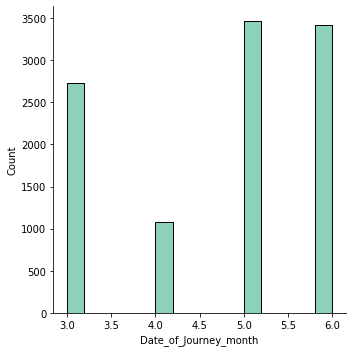

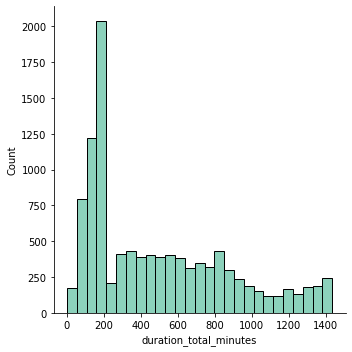

In [21]:
for feature in ['Date_of_Journey_month','duration_total_minutes']:
    sns.displot(x=feature,data=data)

In [22]:
all_stops=[]
for route in data['Route']:
    stops = re.split('→| ',str(route))
    if len(stops)>1:
        stops.pop(0)
        stops.pop(-1)
        inbetween_stops=[stop for stop in stops if stop != '']
        if len(inbetween_stops)>0:
            all_stops.extend(inbetween_stops)
    else:
        all_stops.extend(stops)
    
all_inbetween_stops=set(all_stops)

In [23]:
src_dest= {'Banglore':'BLR', 'Kolkata':'CCU', 'Delhi':'DEL', 'Chennai':'MAA', 'Mumbai':'BOM','New Delhi':'DEL', 'Cochin':'COK', 'Hyderabad':'HYD'}

In [24]:
for stop in all_inbetween_stops:
    data[stop]=0

In [25]:
data['Source']=data['Source'].map(src_dest)
data['Destination']=data['Destination'].map(src_dest)
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_month,Dep_Time_Hour,Dep_Time_Min,Arrival_Time_Hour,Arrival_Time_Min,duration_hours,duration_minutes,duration_total_minutes,IDR,VGA,BBI,GAU,IXZ,BDQ,LKO,ISK,JLR,IXC,IXA,HYD,nan,NDC,IMF,AMD,GOI,RPR,PNQ,UDR,CCU,GWL,IXB,DED,IXR,NAG,ATQ,TRV,DEL,BHO,BOM,STV,BLR,COK,VTZ,JAI,KNU,VNS,PAT,HBX,MAA,IXU,JDH
0,IndiGo,24/03/2019,BLR,DEL,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,22,20,1,10,2,50,170,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
i=0
for route in data['Route']:
    for stop in all_inbetween_stops:
        source=data['Source'][i]
        destination=data['Destination'][i]
        if stop in str(route):
            if stop != source and stop !=destination:
                data[stop][i] =1
    i=i+1

C:\Users\poora\Anaconda3\envs\flightfare\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


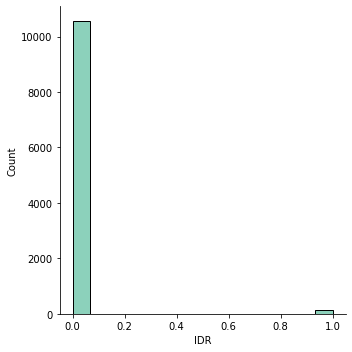

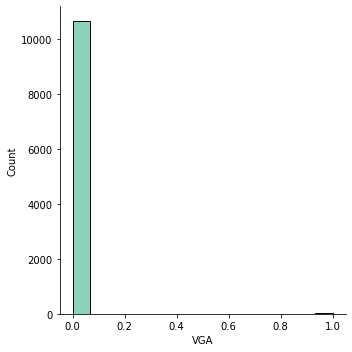

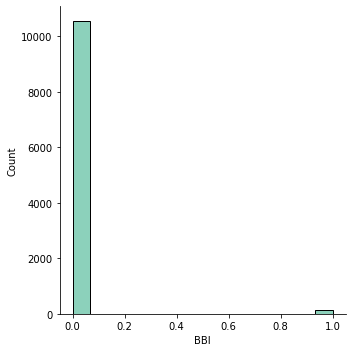

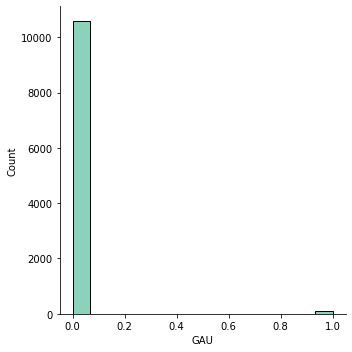

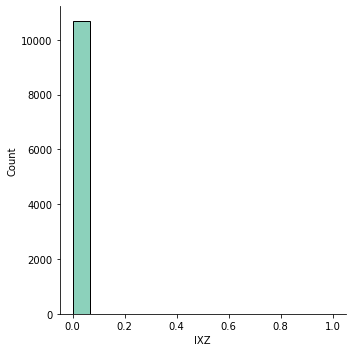

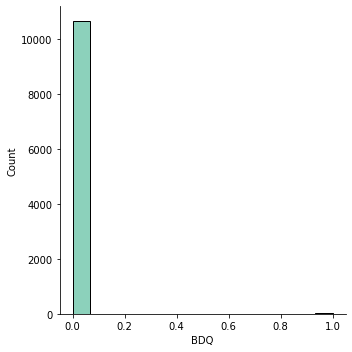

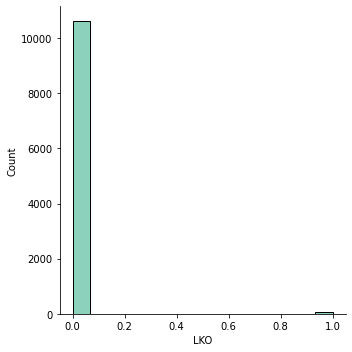

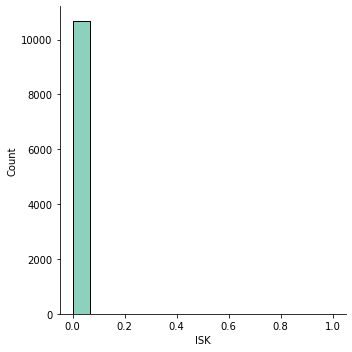

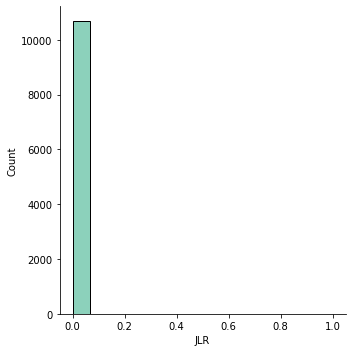

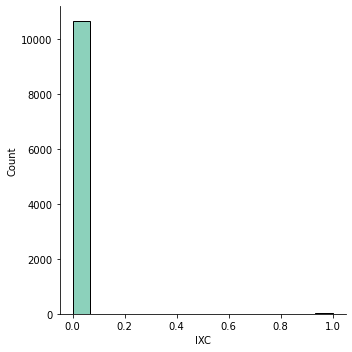

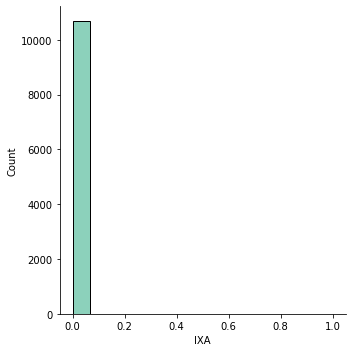

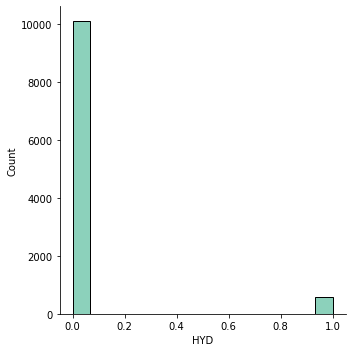

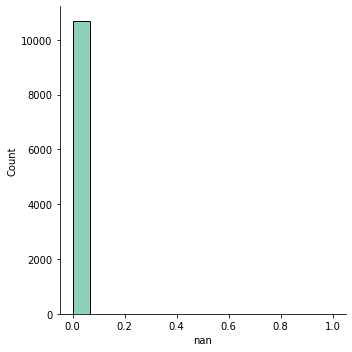

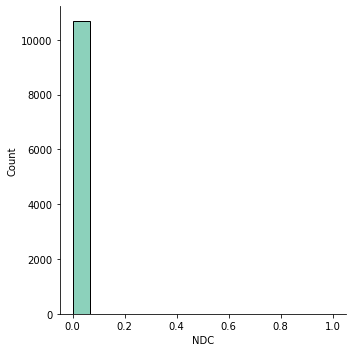

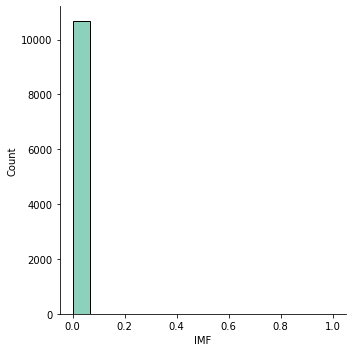

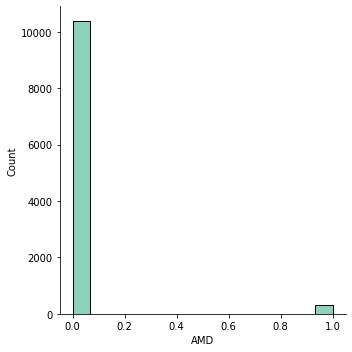

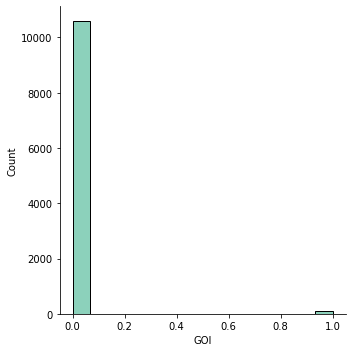

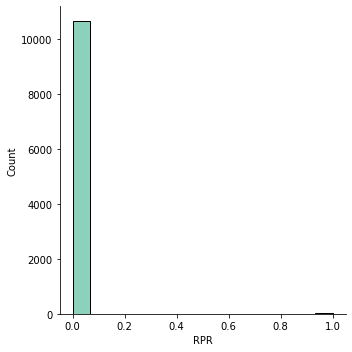

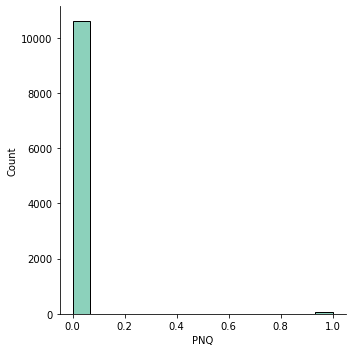

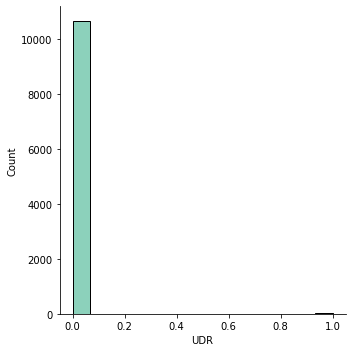

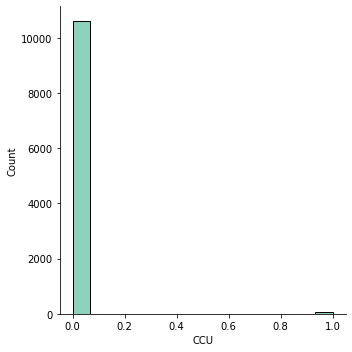

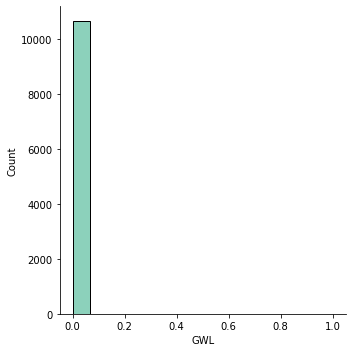

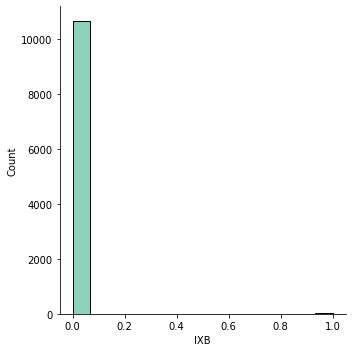

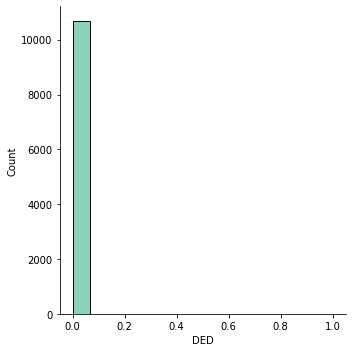

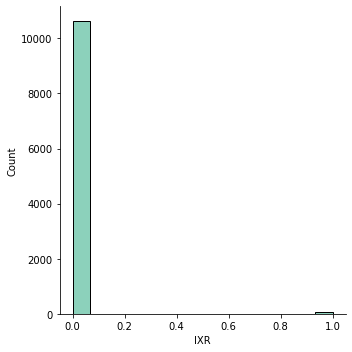

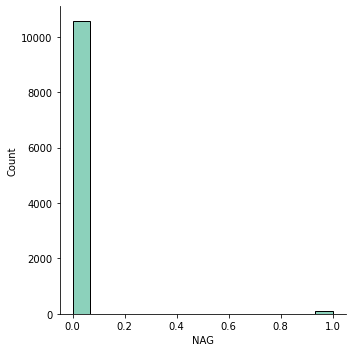

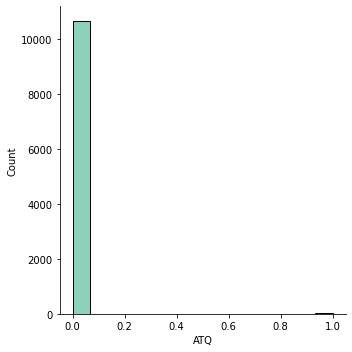

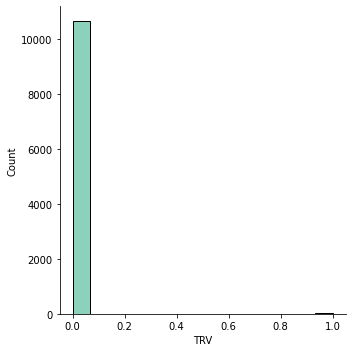

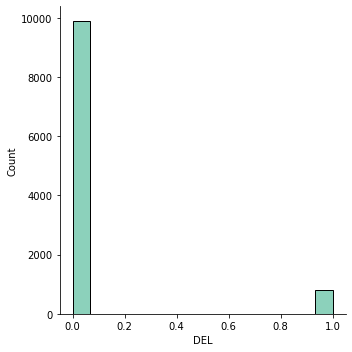

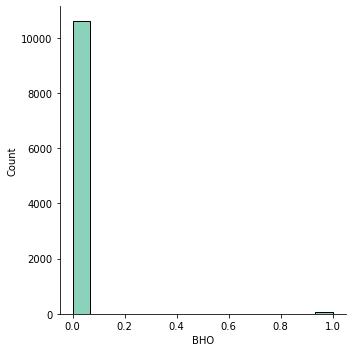

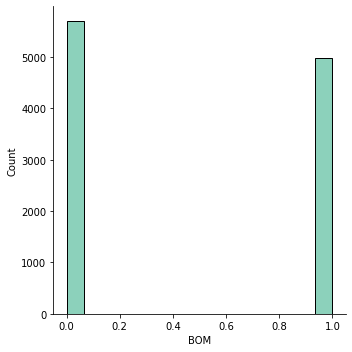

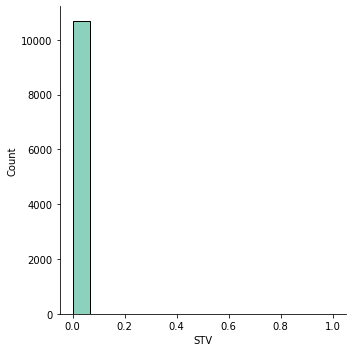

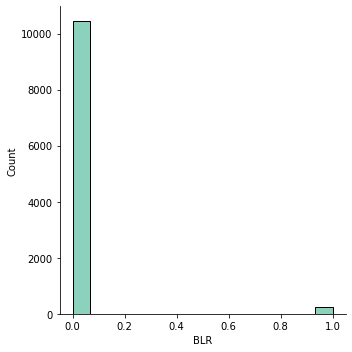

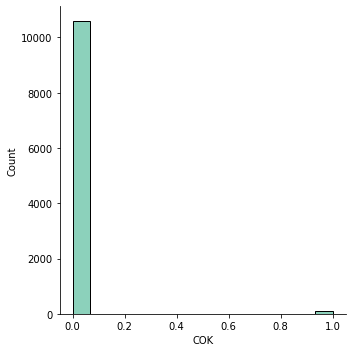

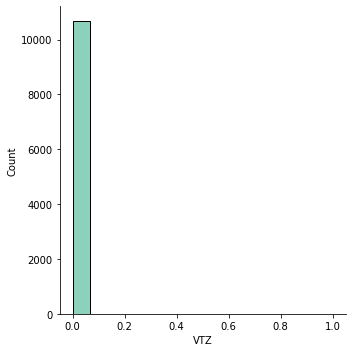

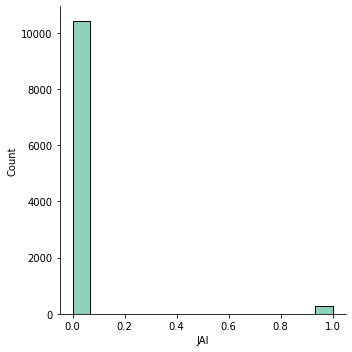

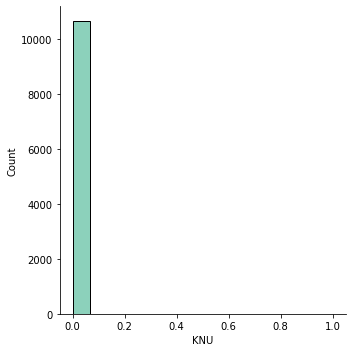

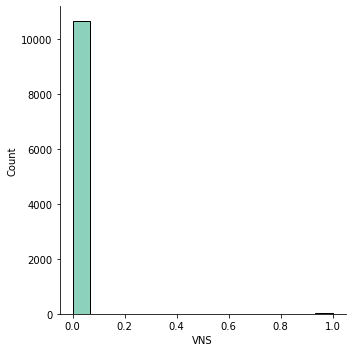

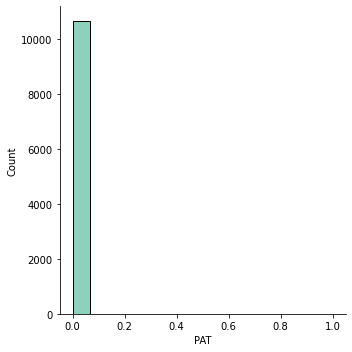

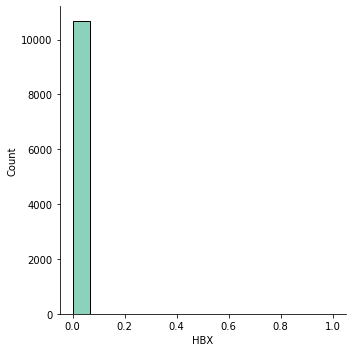

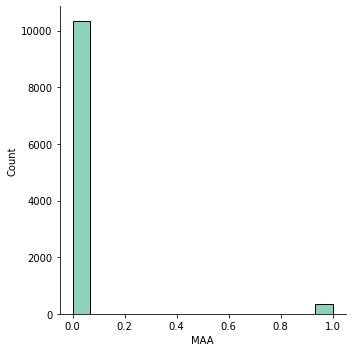

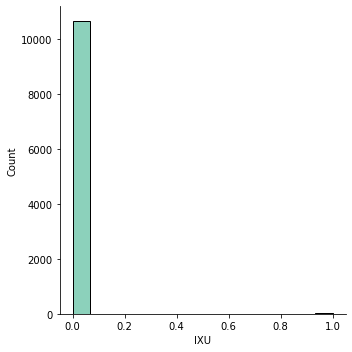

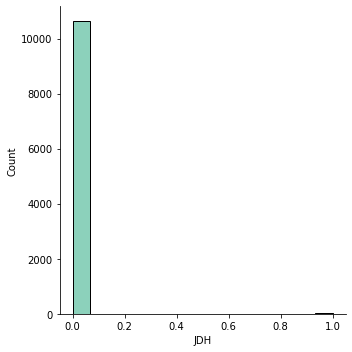

In [27]:
for feature in all_inbetween_stops:
    sns.displot(x=feature,data=data)

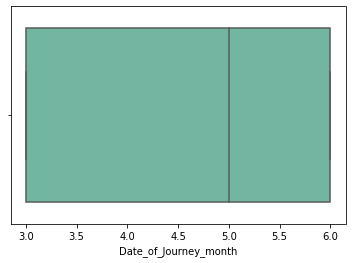

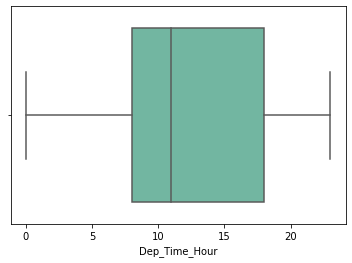

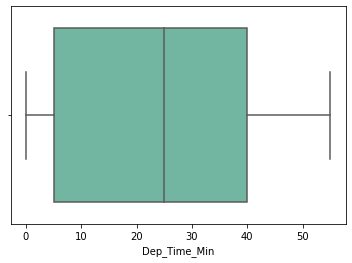

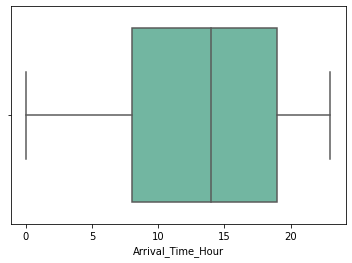

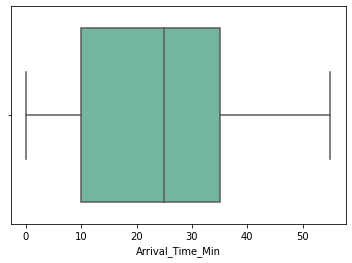

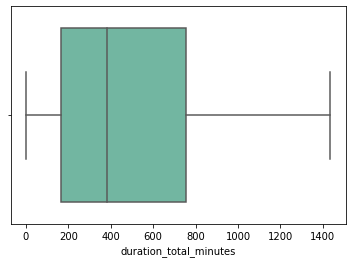

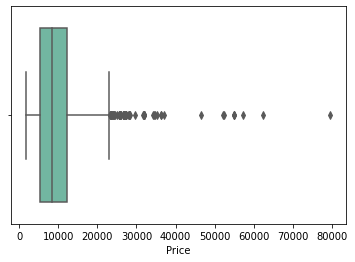

In [28]:
for feature in ['Date_of_Journey_month','Dep_Time_Hour','Dep_Time_Min','Arrival_Time_Hour','Arrival_Time_Min','duration_total_minutes','Price']:
    sns.boxplot(x=feature,data=data)
    plt.show()

In [29]:
data['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

### Bivariate Analysis

In [30]:
data.drop(['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration','duration_hours','duration_minutes'],axis=1,inplace=True)

In [31]:
data.head(1)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date_of_Journey_month,Dep_Time_Hour,Dep_Time_Min,Arrival_Time_Hour,Arrival_Time_Min,duration_total_minutes,IDR,VGA,BBI,GAU,IXZ,BDQ,LKO,ISK,JLR,IXC,IXA,HYD,nan,NDC,IMF,AMD,GOI,RPR,PNQ,UDR,CCU,GWL,IXB,DED,IXR,NAG,ATQ,TRV,DEL,BHO,BOM,STV,BLR,COK,VTZ,JAI,KNU,VNS,PAT,HBX,MAA,IXU,JDH
0,IndiGo,BLR,DEL,non-stop,No info,3897,3,22,20,1,10,170,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
categorical_features=['Airline','Source','Destination','Total_Stops','Additional_Info']
date_time_features=['Date_of_Journey_month','Dep_Time_Hour','Dep_Time_Min','Arrival_Time_Hour','Arrival_Time_Min','duration_total_minutes']
target='Price'

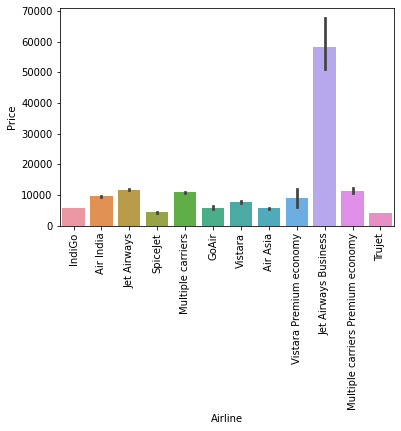

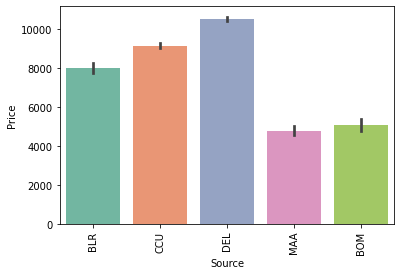

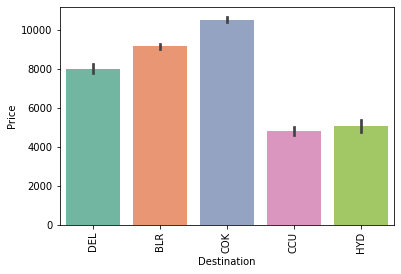

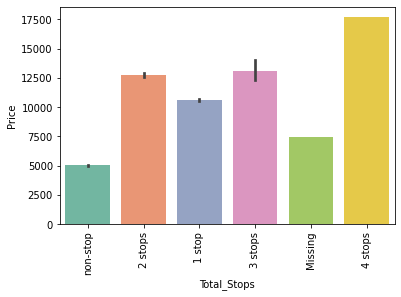

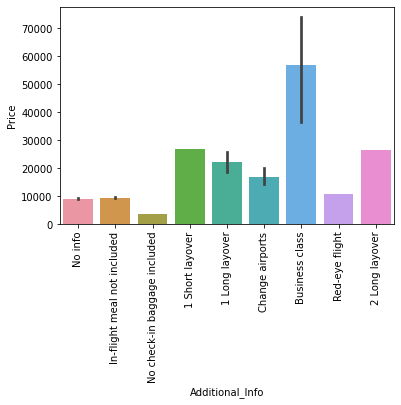

In [33]:
for feature in categorical_features:
    plt.xticks(rotation=90)
    sns.barplot(x=feature,y='Price',data=data)
    plt.show()

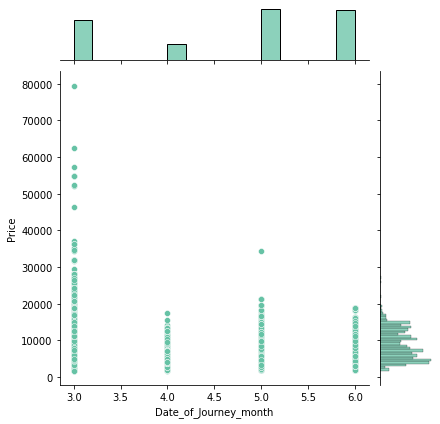

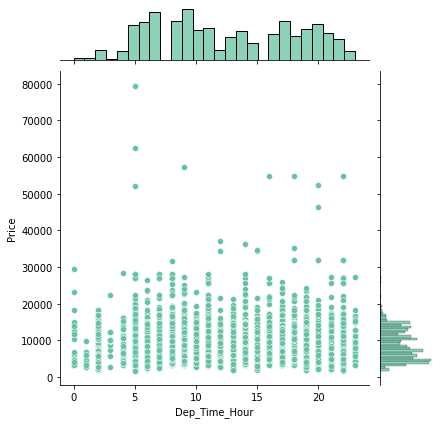

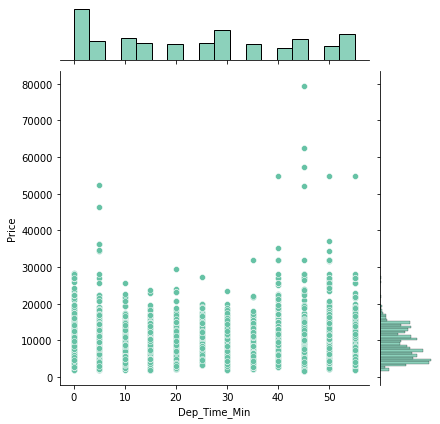

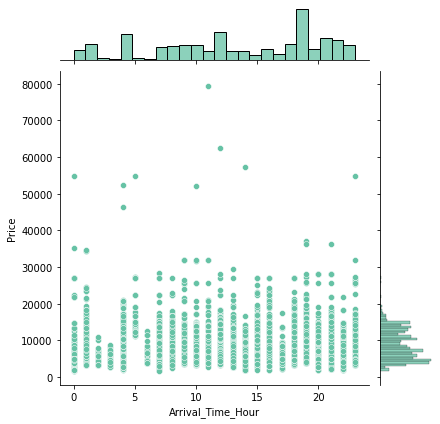

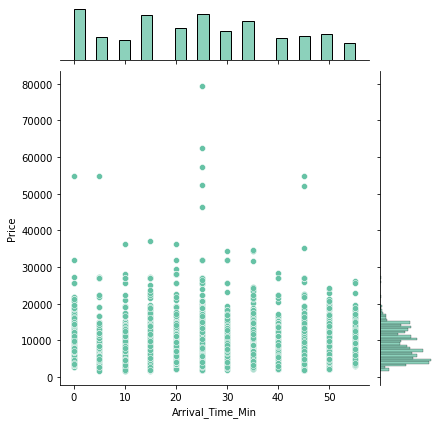

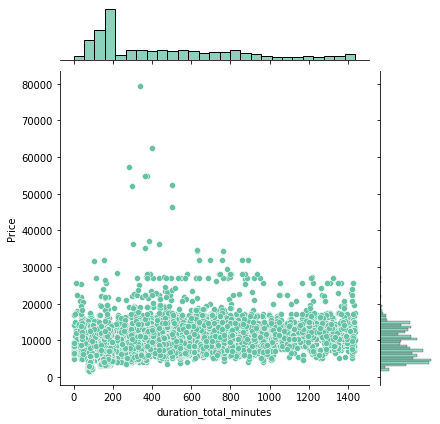

In [34]:
for feature in date_time_features:
    sns.jointplot(x=feature,y='Price',data=data)
    plt.show()

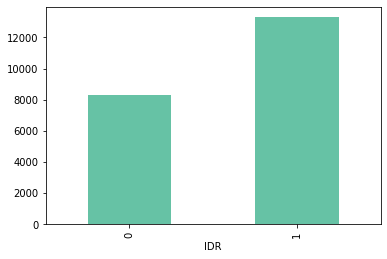

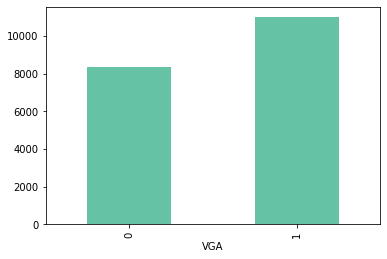

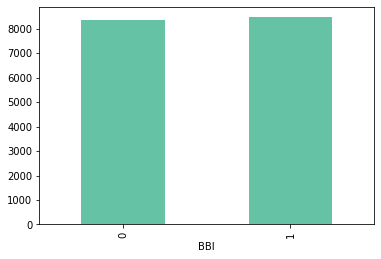

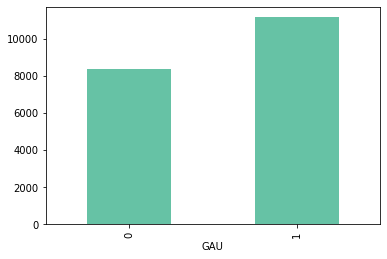

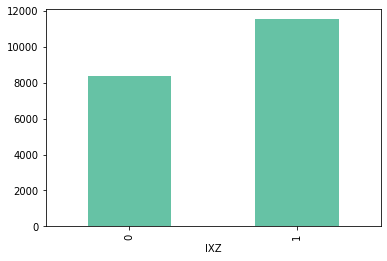

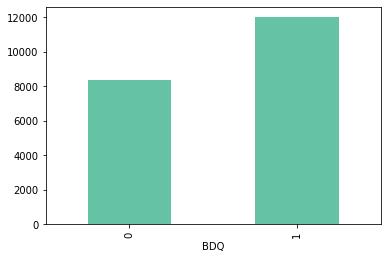

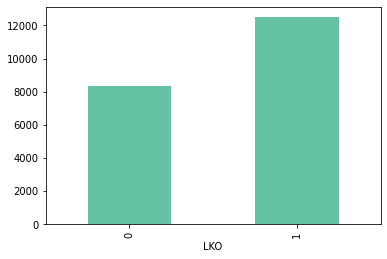

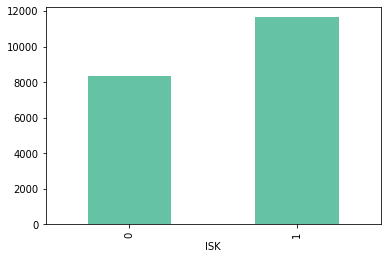

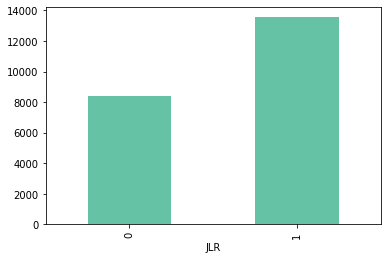

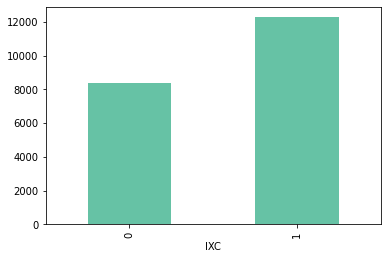

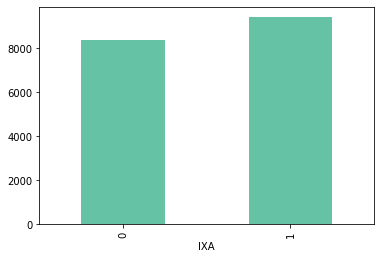

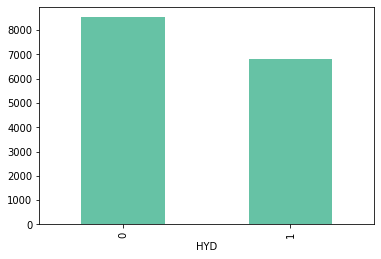

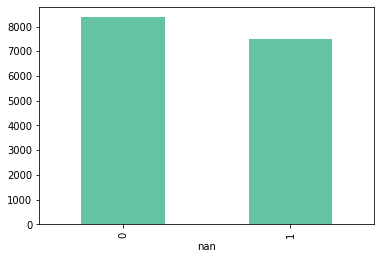

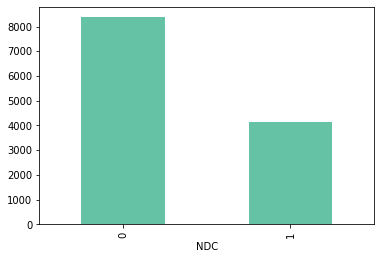

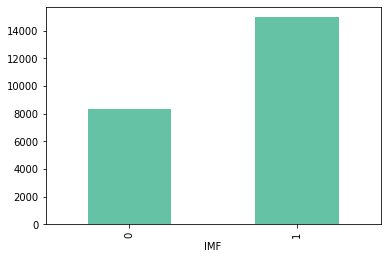

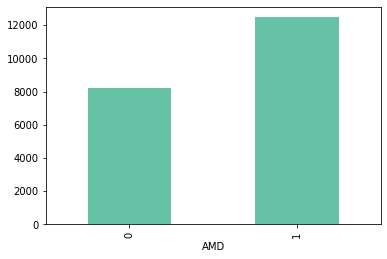

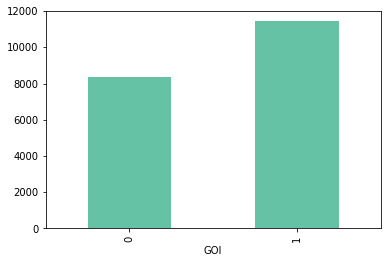

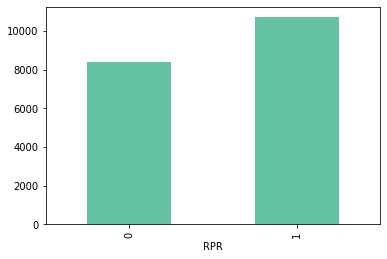

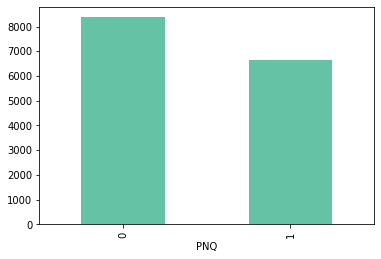

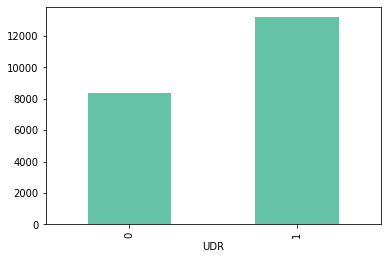

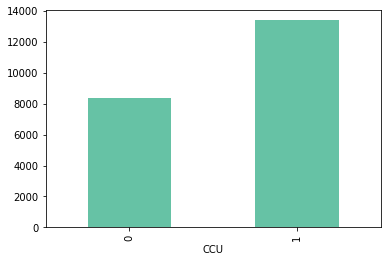

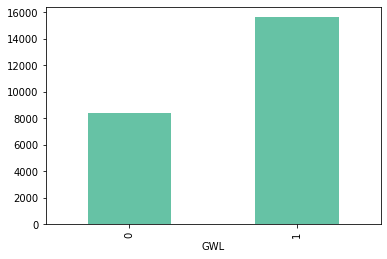

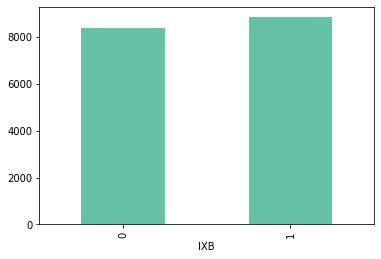

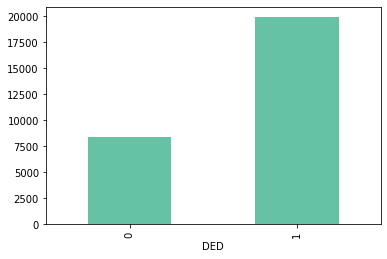

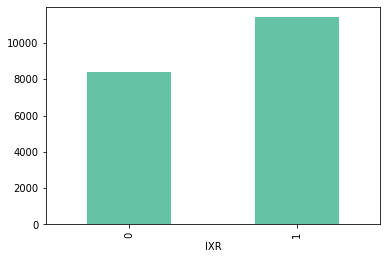

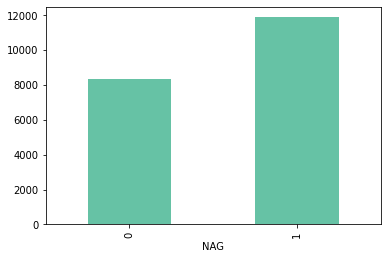

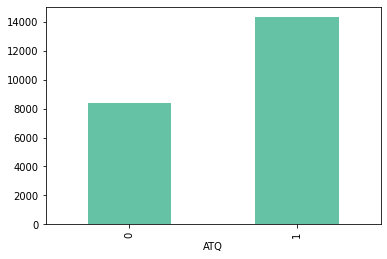

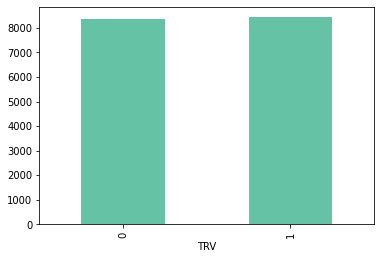

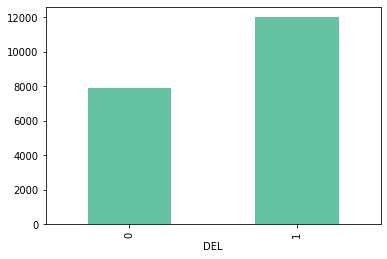

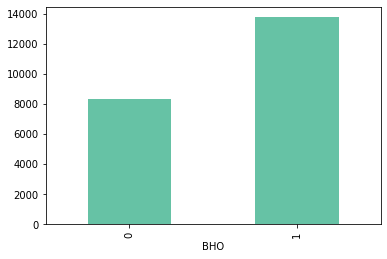

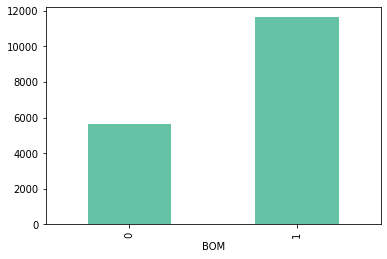

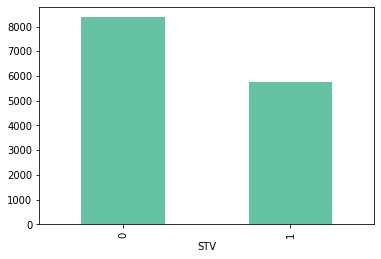

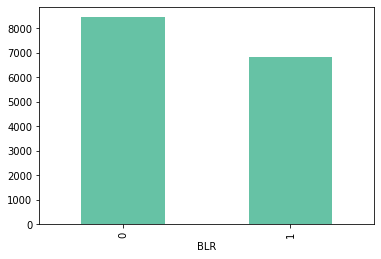

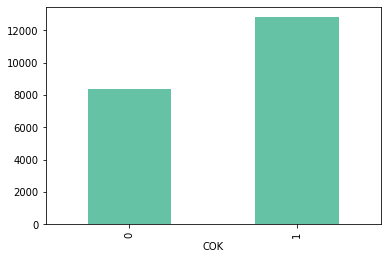

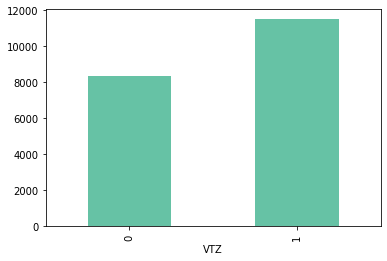

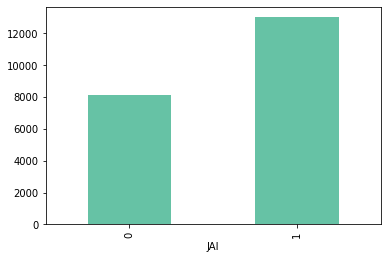

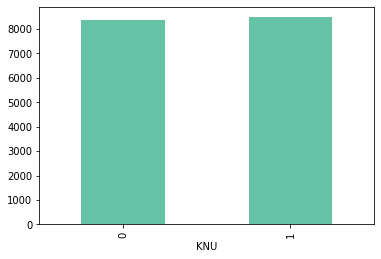

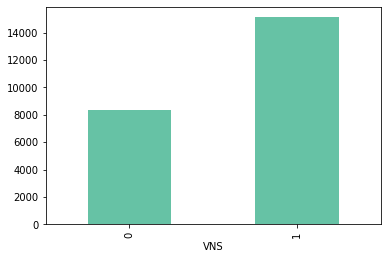

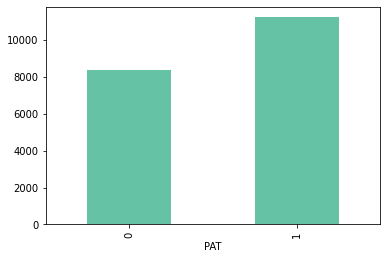

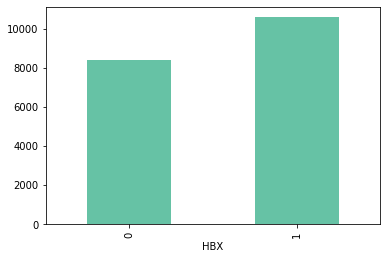

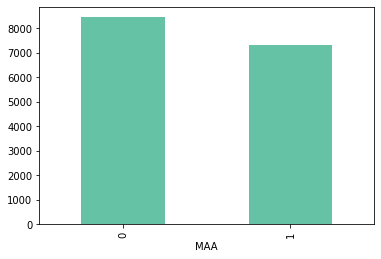

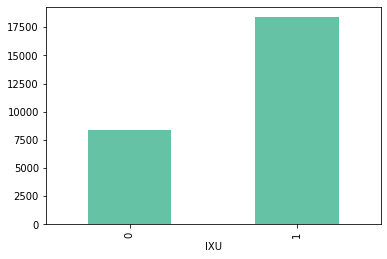

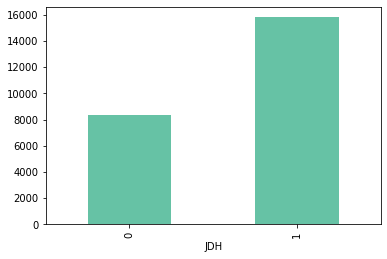

In [35]:
for feature in all_inbetween_stops:
    data.groupby(feature)['Price'].median().plot.bar()
    plt.show()

## Feature Engineering

In [36]:
X=dataset.copy()
X.drop('Price',inplace=True,axis=1)
y=dataset['Price']

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [38]:
X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)

In [39]:
X_train=X_train.fillna('Missing')

In [40]:
X_test=X_test.fillna('Missing')

In [41]:
X_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [42]:
X_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [43]:
X_train['Date_of_Journey_month']=pd.to_datetime(X_train['Date_of_Journey'],format='%d/%m/%Y').dt.month
X_train['Dep_Time_Hour']=pd.to_datetime(X_train['Dep_Time']).dt.hour
X_train['Dep_Time_Min']=pd.to_datetime(X_train['Dep_Time']).dt.minute
X_train['Arrival_Time_Hour']=pd.to_datetime(X_train['Arrival_Time']).dt.hour
X_train['Arrival_Time_Min']=pd.to_datetime(X_train['Arrival_Time']).dt.minute

In [44]:
X_test['Date_of_Journey_month']=pd.to_datetime(X_test['Date_of_Journey'],format='%d/%m/%Y').dt.month
X_test['Dep_Time_Hour']=pd.to_datetime(X_test['Dep_Time']).dt.hour
X_test['Dep_Time_Min']=pd.to_datetime(X_test['Dep_Time']).dt.minute
X_test['Arrival_Time_Hour']=pd.to_datetime(X_test['Arrival_Time']).dt.hour
X_test['Arrival_Time_Min']=pd.to_datetime(X_test['Arrival_Time']).dt.minute

In [45]:
duration=pd.to_timedelta(pd.to_datetime(X_train['Arrival_Time']) -pd.to_datetime(X_train['Dep_Time']))
X_train['duration_hours']=duration.dt.components['hours']
X_train['duration_minutes']=duration.dt.components['minutes']
X_train['duration_total_minutes']=duration.dt.components['hours']*60 + duration.dt.components['minutes']
X_train['Source']=X_train['Source'].map(src_dest)
X_train['Destination']=X_train['Destination'].map(src_dest)

In [46]:
duration=pd.to_timedelta(pd.to_datetime(X_test['Arrival_Time']) -pd.to_datetime(X_test['Dep_Time']))
X_test['duration_hours']=duration.dt.components['hours']
X_test['duration_minutes']=duration.dt.components['minutes']
X_test['duration_total_minutes']=duration.dt.components['hours']*60 + duration.dt.components['minutes']
X_test['Source']=X_test['Source'].map(src_dest)
X_test['Destination']=X_test['Destination'].map(src_dest)

In [47]:
X_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date_of_Journey_month,Dep_Time_Hour,Dep_Time_Min,Arrival_Time_Hour,Arrival_Time_Min,duration_hours,duration_minutes,duration_total_minutes
0,Vistara,21/05/2019,CCU,BLR,CCU → DEL → BLR,20:20,18:50 22 May,22h 30m,1 stop,No info,5,20,20,18,50,22,30,1350
1,GoAir,24/03/2019,CCU,BLR,CCU → HYD → BLR,06:35,14:25,7h 50m,1 stop,No info,3,6,35,14,25,7,50,470
2,Jet Airways,06/03/2019,BLR,DEL,BLR → BOM → DEL,22:50,10:25 07 Mar,11h 35m,1 stop,No info,3,22,50,10,25,11,35,695
3,Jet Airways,27/06/2019,DEL,COK,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,6,23,5,19,0,19,55,1195
4,IndiGo,27/05/2019,CCU,BLR,CCU → BLR,22:15,00:50 28 May,2h 35m,non-stop,No info,5,22,15,0,50,2,35,155


In [48]:
X_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date_of_Journey_month,Dep_Time_Hour,Dep_Time_Min,Arrival_Time_Hour,Arrival_Time_Min,duration_hours,duration_minutes,duration_total_minutes
0,IndiGo,27/03/2019,DEL,COK,DEL → HYD → COK,04:55,16:10,11h 15m,1 stop,No info,3,4,55,16,10,11,15,675
1,SpiceJet,27/05/2019,CCU,BLR,CCU → BLR,22:20,00:40 28 May,2h 20m,non-stop,No info,5,22,20,0,40,2,20,140
2,Air India,6/06/2019,CCU,BLR,CCU → IXR → DEL → BLR,05:50,20:25,14h 35m,2 stops,No info,6,5,50,20,25,14,35,875
3,Jet Airways,06/03/2019,BLR,DEL,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,No info,3,9,45,14,25,4,40,280
4,IndiGo,15/06/2019,DEL,COK,DEL → BOM → COK,16:00,01:30 16 Jun,9h 30m,1 stop,No info,6,16,0,1,30,9,30,570


In [49]:
for stop in all_inbetween_stops:
    X_train[stop]=0
    X_test[stop]=0

In [50]:
i=0
for route in X_train['Route']:
    for stop in all_inbetween_stops:
        source=X_train['Source'][i]
        destination=X_train['Destination'][i]
        if stop in str(route):
            if stop != source and stop !=destination:
                X_train[stop][i] =1
    i=i+1

In [51]:
i=0
for route in X_test['Route']:
    for stop in all_inbetween_stops:
        source=X_test['Source'][i]
        destination=X_test['Destination'][i]
        if stop in str(route):
            if stop != source and stop !=destination:
                X_test[stop][i] =1
    i=i+1

In [52]:
X_train['Additional_Info']=np.where(X_train['Additional_Info']=='No Info','No info',X_train['Additional_Info'])
X_test['Additional_Info']=np.where(X_test['Additional_Info']=='No Info','No info',X_test['Additional_Info'])

In [53]:
X_train.drop(['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration','duration_hours','duration_minutes','nan'],axis=1,inplace=True)
X_test.drop(['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration','duration_hours','duration_minutes','nan'],axis=1,inplace=True)

### Treating categorical variables

In [54]:
for feature in ['Airline','Source', 'Destination', 'Additional_Info']:
    cat_counts=X_train[feature].value_counts().index
    cat_dict={c:i for i,c in enumerate(cat_counts)}
    print(cat_dict)
    X_train[feature]=X_train[feature].map(cat_dict)
    X_test[feature]=X_test[feature].map(cat_dict)

{'Jet Airways': 0, 'IndiGo': 1, 'Air India': 2, 'Multiple carriers': 3, 'SpiceJet': 4, 'Vistara': 5, 'Air Asia': 6, 'GoAir': 7, 'Multiple carriers Premium economy': 8, 'Jet Airways Business': 9, 'Vistara Premium economy': 10, 'Trujet': 11}
{'DEL': 0, 'CCU': 1, 'BLR': 2, 'BOM': 3, 'MAA': 4}
{'COK': 0, 'BLR': 1, 'DEL': 2, 'HYD': 3, 'CCU': 4}
{'No info': 0, 'In-flight meal not included': 1, 'No check-in baggage included': 2, '1 Long layover': 3, 'Business class': 4, 'Change airports': 5, '2 Long layover': 6, 'Red-eye flight': 7, '1 Short layover': 8}


In [55]:
X_train['Total_Stops'].unique()

array(['1 stop', '2 stops', 'non-stop', '3 stops', 'Missing'],
      dtype=object)

In [56]:
total_stops_dict={'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4,'Missing':0}

In [57]:
X_train['Total_Stops']=X_train['Total_Stops'].map(total_stops_dict)
X_test['Total_Stops']=X_test['Total_Stops'].map(total_stops_dict)

In [58]:
X_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Date_of_Journey_month,Dep_Time_Hour,Dep_Time_Min,Arrival_Time_Hour,Arrival_Time_Min,duration_total_minutes,IDR,VGA,BBI,GAU,IXZ,BDQ,LKO,ISK,JLR,IXC,IXA,HYD,NDC,IMF,AMD,GOI,RPR,PNQ,UDR,CCU,GWL,IXB,DED,IXR,NAG,ATQ,TRV,DEL,BHO,BOM,STV,BLR,COK,VTZ,JAI,KNU,VNS,PAT,HBX,MAA,IXU,JDH
0,5,1,1,1,0,5,20,20,18,50,1350,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7,1,1,1,0,3,6,35,14,25,470,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,2,2,1,0,3,22,50,10,25,695,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,2,1,6,23,5,19,0,1195,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,5,22,15,0,50,155,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [59]:
X_test.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Date_of_Journey_month,Dep_Time_Hour,Dep_Time_Min,Arrival_Time_Hour,Arrival_Time_Min,duration_total_minutes,IDR,VGA,BBI,GAU,IXZ,BDQ,LKO,ISK,JLR,IXC,IXA,HYD,NDC,IMF,AMD,GOI,RPR,PNQ,UDR,CCU,GWL,IXB,DED,IXR,NAG,ATQ,TRV,DEL,BHO,BOM,STV,BLR,COK,VTZ,JAI,KNU,VNS,PAT,HBX,MAA,IXU,JDH
0,1,0,0,1,0,3,4,55,16,10,675,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,1,1,0,0,5,22,20,0,40,140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1,1,2,0,6,5,50,20,25,875,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,2,2,1,0,3,9,45,14,25,280,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,1,0,6,16,0,1,30,570,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


## Feature Selection

In [60]:
from sklearn.ensemble import ExtraTreesRegressor
extraTreesRegressor=ExtraTreesRegressor()

In [61]:
extraTreesRegressor.fit(X_train,y_train)

ExtraTreesRegressor()

In [62]:
feature_importances = pd.Series(extraTreesRegressor.feature_importances_,index=X_train.columns)

In [63]:
# select important features
important_features=[]
for feature in X_train.columns:
    if feature_importances[feature] > 0.005:
        important_features.append(feature)
        
len(important_features)

14

In [64]:
important_features

['Airline',
 'Source',
 'Destination',
 'Total_Stops',
 'Additional_Info',
 'Date_of_Journey_month',
 'Dep_Time_Hour',
 'Dep_Time_Min',
 'Arrival_Time_Hour',
 'Arrival_Time_Min',
 'duration_total_minutes',
 'ATQ',
 'DEL',
 'BOM']

In [65]:
X_train_selected = X_train[['Airline',
 'Source',
 'Destination',
 'Total_Stops',
 'Additional_Info',
 'Date_of_Journey_month',
 'Dep_Time_Hour',
 'Dep_Time_Min',
 'Arrival_Time_Hour',
 'Arrival_Time_Min',
 'duration_total_minutes',
 'DEL',
 'BOM']]

In [66]:
X_test_selected = X_test[['Airline',
 'Source',
 'Destination',
 'Total_Stops',
 'Additional_Info',
 'Date_of_Journey_month',
 'Dep_Time_Hour',
 'Dep_Time_Min',
 'Arrival_Time_Hour',
 'Arrival_Time_Min',
 'duration_total_minutes',
 'DEL',
 'BOM']]

## Model Training

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [68]:
RF_model=RandomForestRegressor()

In [69]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=2000,num=50)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
min_samples_split=[10,15,100,250]
min_samples_leaf=[5,10,15]

In [70]:
random_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf}

In [71]:
regressor=RandomizedSearchCV(RF_model,
                             param_distributions=random_grid,
                             scoring='neg_mean_squared_error',
                             n_iter=10,
                             cv=10,
                             verbose=2,
                             random_state=42)

In [72]:
regressor.fit(X_train_selected,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] n_estimators=487, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=487, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   3.1s
[CV] n_estimators=487, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


[CV]  n_estimators=487, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   3.2s
[CV] n_estimators=487, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=487, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   2.3s
[CV] n_estimators=487, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=487, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   3.0s
[CV] n_estimators=487, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=487, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   3.1s
[CV] n_estimators=487, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=487, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   3.3s
[CV] n_estimators=487, min_samples_split=15

[CV]  n_estimators=953, min_samples_split=250, min_samples_leaf=5, max_features=auto, max_depth=20, total=  16.0s
[CV] n_estimators=953, min_samples_split=250, min_samples_leaf=5, max_features=auto, max_depth=20 
[CV]  n_estimators=953, min_samples_split=250, min_samples_leaf=5, max_features=auto, max_depth=20, total=  16.1s
[CV] n_estimators=953, min_samples_split=250, min_samples_leaf=5, max_features=auto, max_depth=20 
[CV]  n_estimators=953, min_samples_split=250, min_samples_leaf=5, max_features=auto, max_depth=20, total=  15.8s
[CV] n_estimators=953, min_samples_split=250, min_samples_leaf=5, max_features=auto, max_depth=20 
[CV]  n_estimators=953, min_samples_split=250, min_samples_leaf=5, max_features=auto, max_depth=20, total=  16.2s
[CV] n_estimators=953, min_samples_split=250, min_samples_leaf=5, max_features=auto, max_depth=20 
[CV]  n_estimators=953, min_samples_split=250, min_samples_leaf=5, max_features=auto, max_depth=20, total=  15.9s
[CV] n_estimators=953, min_samples

[CV]  n_estimators=681, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=30, total=  16.9s
[CV] n_estimators=720, min_samples_split=15, min_samples_leaf=15, max_features=auto, max_depth=5 
[CV]  n_estimators=720, min_samples_split=15, min_samples_leaf=15, max_features=auto, max_depth=5, total=  10.8s
[CV] n_estimators=720, min_samples_split=15, min_samples_leaf=15, max_features=auto, max_depth=5 
[CV]  n_estimators=720, min_samples_split=15, min_samples_leaf=15, max_features=auto, max_depth=5, total=  10.4s
[CV] n_estimators=720, min_samples_split=15, min_samples_leaf=15, max_features=auto, max_depth=5 
[CV]  n_estimators=720, min_samples_split=15, min_samples_leaf=15, max_features=auto, max_depth=5, total=  10.4s
[CV] n_estimators=720, min_samples_split=15, min_samples_leaf=15, max_features=auto, max_depth=5 
[CV]  n_estimators=720, min_samples_split=15, min_samples_leaf=15, max_features=auto, max_depth=5, total=   9.9s
[CV] n_estimators=720, min_samples_split=1

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 29.7min finished


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [5, 10, 15],
                                        'min_samples_split': [10, 15, 100, 250],
                                        'n_estimators': [100, 138, 177, 216,
                                                         255, 293, 332, 371,
                                                         410, 448, 487, 526,
                                                         565, 604, 642, 681,
                                                         720, 759, 797, 836,
                                                         875, 914, 953, 991,
                                                         1030, 1069, 1108, 1146,
                                                         1185, 1224, ...]},
              

In [73]:
regressor.best_params_

{'n_estimators': 1728,
 'min_samples_split': 15,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 15}

In [74]:
regressor.best_score_

-5480061.632415192

In [75]:
final_model=RandomForestRegressor(n_estimators=1728,
 min_samples_split= 15,
 min_samples_leaf= 5,
 max_features= 'sqrt',
 max_depth=15)

In [76]:
final_model.fit(X_train_selected,y_train)

RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_leaf=5,
                      min_samples_split=15, n_estimators=1728)

In [77]:
predictions=final_model.predict(X_test_selected)

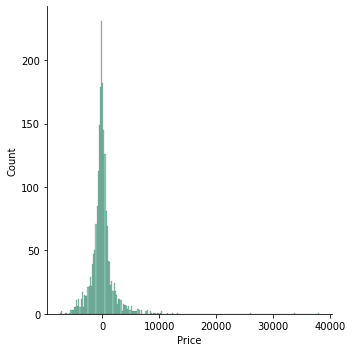

In [78]:
sns.displot(y_test-predictions)

In [79]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [80]:
mean_price=y_train.mean()

In [81]:
sum(np.abs(mean_price-y_train))/len(y_train)

3648.458745060969

In [82]:
sum(np.abs(y_test.mean()-y_test))/len(y_test)

3679.2781977805325

In [83]:
print('MAE: ',mean_absolute_error(y_test,predictions))
print('MSE: ',mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,predictions)))

MAE:  1227.4052005817962
MSE:  5097467.954977496
RMSE:  2257.757284337157


## Save Model

In [84]:
import pickle
file=open('final_model.pkl','wb')
pickle.dump(final_model,file)